In [1]:
import sqlalchemy
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import numpy as np

# Create an engine instance

engine = create_engine('postgresql://postgres:<password>@localhost:5432/homework_db')

connection = engine.connect()

# Connect to PostgreSQL server

dbConnection    = engine.connect();
 

# Read data from PostgreSQL database table and load into DataFrames

#SQL to get data for the salary frequency histogram
# 
salaries_freq_df=pd.read_sql(
"select salary from salaries",dbConnection)

#SQL to get average salary for each job title
# 
salaries_avg_title_df = pd.read_sql(  \
"select round(avg(salary),0) avg_salary, title \
from salaries sal \
inner join employees emp on emp.emp_no = sal.emp_no \
inner join titles ti on ti.title_id = emp.emp_title_id \
group by title", dbConnection)

#Not requested for homework but I chose to see the data
#SQL to see the top 10 most common salary for employees
salaries_freq_df2 = pd.read_sql(
"select count(salary) AS No_of_Employees,  salary from salaries \
 group by salary \
 order by count(salary) desc limit 10", dbConnection);
#pds.set_option('display.expand_frame_repr', False);

#Not requested for homework but I chose to see the data
#SQL to see the top 10 most common salary for employees excluding the massive outlier (see plot)
#of most common salaries
salaries_freq_df3=pd.read_sql(
"select count(salary) AS No_of_Employees ,salary from salaries \
group by salary \
having count(salary) < 20 \
order by count(salary) desc \
limit 10",dbConnection)

#Salary formatting not used as it makes data non-numeric and hence not plottable
#But useful just for viewing data when required

#salaries_freq_df["salary"]=salaries_freq_df["salary"].map("${:,.0f}".format)
#salaries_freq_df2["salary"]=salaries_freq_df2["salary"].map("${:,.0f}".format)
#salaries_avg_title_df["avg_salary"]=salaries_avg_title_df["avg_salary"].map("${:,.0f}".format)

# Print the DataFrame

print('List of Salaries')
print(salaries_freq_df)

dbConnection.close();

List of Salaries
        salary
0        60117
1        65828
2        40006
3        40054
4        78228
...        ...
300019   40000
300020   58058
300021   49597
300022   40000
300023   63707

[300024 rows x 1 columns]


In [2]:
print('Average salary for each job title')
print('---------------------------------')
print(salaries_avg_title_df)


Average salary for each job title
---------------------------------
   avg_salary               title
0     48564.0  Assistant Engineer
1     48535.0            Engineer
2     51531.0             Manager
3     48507.0     Senior Engineer
4     58550.0        Senior Staff
5     58465.0               Staff
6     48583.0    Technique Leader


In [3]:
print('Top 10 most common salaries')
print('---------------------------')
print(salaries_freq_df2)
#Note massive outlier pf most common

Top 10 most common salaries
---------------------------
   no_of_employees  salary
0            95346   40000
1               19   55581
2               18   53738
3               18   53078
4               17   47454
5               17   44564
6               17   45184
7               16   43710
8               16   49416
9               16   51499


In [4]:
print('Top 10 most common salaries excluding most common - see up above why')
print('--------------------------------------------------------------------')
print(salaries_freq_df3)

Top 10 most common salaries excluding most common - see up above why
--------------------------------------------------------------------
   no_of_employees  salary
0               19   55581
1               18   53738
2               18   53078
3               17   47454
4               17   45184
5               17   44564
6               16   43710
7               16   49416
8               16   51499
9               16   43995


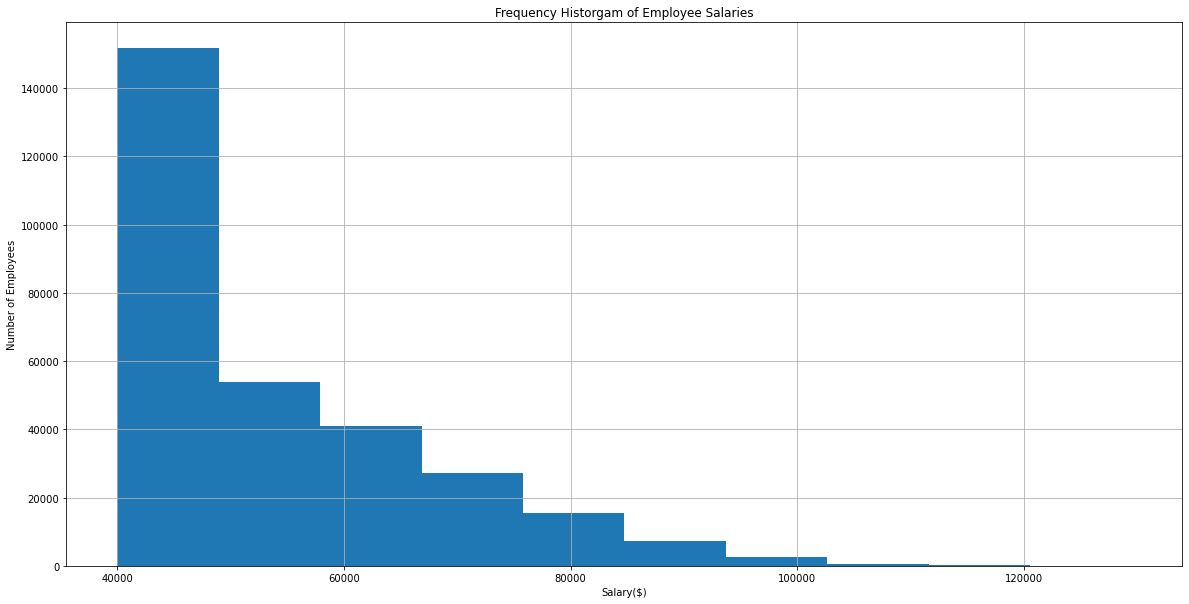

In [24]:
#Frequency Histogram of employee salaries

# Set title
# Creating histogram
fig, ax = plt.subplots(1, 1)
ax.hist(salaries_freq_df)
ax.set_title("Frequency Historgam of Employee Salaries")
ax.grid()
# adding labels
ax.set_xlabel('Salary($)')
ax.set_ylabel('Number of Employees')
plt.rcParams["figure.figsize"] = (10,5)
plt.savefig("Images/Frequency Historgam of Employee Salaries.jpg")


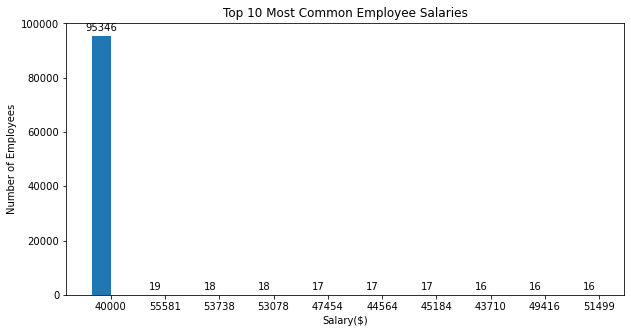

In [15]:

#Not requested for homework but I chose to see the data as there is a massive outlier
#Plot to compare the massive outlier compared to other top 9 values 

salary = salaries_freq_df2["salary"]
num_emps = salaries_freq_df2["no_of_employees"]
x = np.arange(len(salary)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Number of Employees')
ax.set_xlabel('Salary($)')
ax.set_title('Top 10 Most Common Employee Salaries')
ax.set_xticks(x)
ax.set_xticklabels(salary)

pps = ax.bar(x - width/2, num_emps, width, label='Number of Employees')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.rcParams["figure.figsize"] = (10,3)
plt.savefig("Images/Top 10 Most common salaries.jpg")
plt.show()

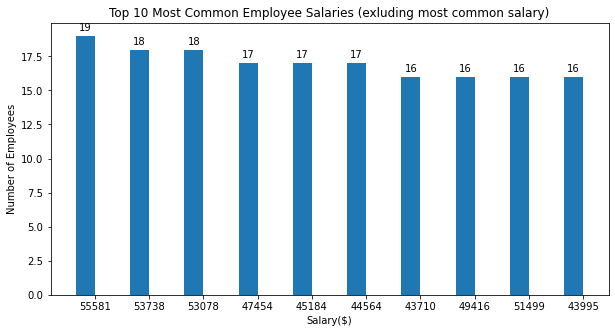

<Figure size 720x216 with 0 Axes>

In [29]:

#Not requested for homework but I chose to see the data as there is a massive outlier
#Plot to exclude the massive outlier compared to other top 9 values 
salary = salaries_freq_df3["salary"]
num_emps = salaries_freq_df3["no_of_employees"]
x = np.arange(len(salary)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

ax.set_ylabel('Number of Employees')
ax.set_xlabel('Salary($)')
ax.set_title('Top 10 Most Common Employee Salaries (exluding most common salary)')
ax.set_xticks(x)
ax.set_xticklabels(salary)

pps = ax.bar(x - width/2, num_emps, width, label='Number of Employees')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.rcParams["figure.figsize"] = (10,3)
plt.show()
plt.savefig("Images/Most common salaries excluding most common salary.jpg")

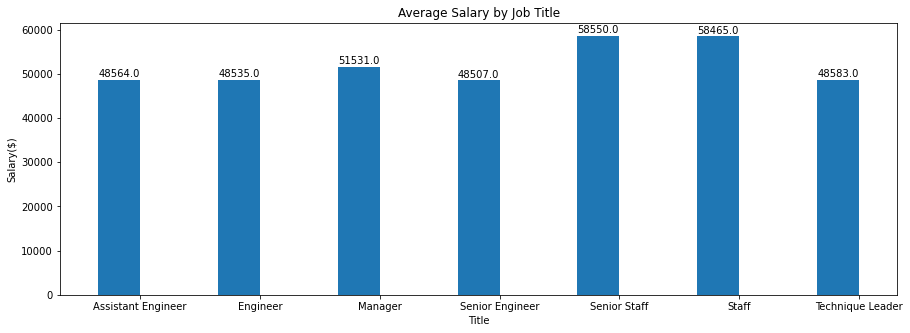

<Figure size 1224x360 with 0 Axes>

In [31]:
#Create a bar chart of average salary by title.

avg_salary = salaries_avg_title_df["avg_salary"]
title = salaries_avg_title_df["title"]
x = np.arange(len(avg_salary)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()

ax.set_xlabel('Title')
ax.set_ylabel('Salary($)')
ax.set_title('Average Salary by Job Title')
ax.set_xticks(x)
ax.set_xticklabels(title)

pps = ax.bar(x - width/2, avg_salary, width, label='Title')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 1), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
plt.rcParams["figure.figsize"] = (17,5)
plt.show()
plt.savefig("Images/Average Salary by Job Title.jpg")